In [2]:
import ROOT as r

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

import mplhep as hep
from root_numpy import hist2array

In [4]:
testFileName = "/STORE/ferencek/TRSM_XToHY_6b/2017/13TeV/NANOAOD/TRSM_XToHY_6b_M3_2000_M2_1100_NANOAOD.root"

f = r.TFile.Open(testFileName)
tree = f.Get("Events")

Warning in <TClass::Init>: no dictionary for class __pair_base<edm::Hash<1>,edm::ParameterSetBlob> is available


In [9]:
jet0Masses = r.TH1F("jet0m","",300,0,3000)
jet1Masses = r.TH1F("jet1m","",300,0,3000)
jet2Masses = r.TH1F("jet2m","",300,0,3000)

nEvts = tree.GetEntriesFast()

for i in range(nEvts):    
    tree.GetEvent(i)
    
    
    if tree.nFatJet<3:
        continue
    
    pts     = tree.FatJet_pt
    etas    = tree.FatJet_eta
    phis    = tree.FatJet_phi
    masses  = tree.FatJet_msoftdrop
    
    jet0Flag = pts[0]>250 and abs(etas[0])<2.5 and masses[0]>60
    jet1Flag = pts[1]>250 and abs(etas[1])<2.5 and masses[1]>60
    jet2Flag = pts[2]>250 and abs(etas[2])<2.5 and masses[2]>60

    if not (jet0Flag and jet1Flag and jet2Flag):
        continue
    
    jet0 = r.TLorentzVector()
    jet0.SetPtEtaPhiM(pts[0],etas[0],phis[0],masses[0])
    
    jet1 = r.TLorentzVector()
    jet1.SetPtEtaPhiM(pts[1],etas[1],phis[1],masses[1])
    
    jet2 = r.TLorentzVector()
    jet2.SetPtEtaPhiM(pts[2],etas[2],phis[2],masses[2])
    
    
    jet0Masses.Fill(jet0.M())
    jet1Masses.Fill(jet1.M())
    jet2Masses.Fill(jet2.M())

Warning in <TFile::Append>: Replacing existing TH1: jet0m (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: jet1m (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: jet2m (Potential memory leak).


AttributeError: Failed to get attribute hist from ROOT

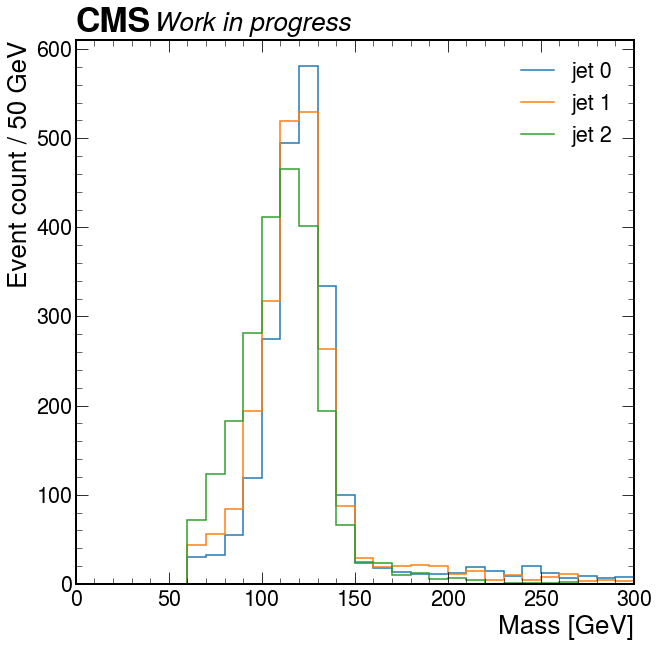

In [54]:
plt.style.use([hep.style.CMS])

jet0, edges = hist2array(jet0Masses,return_edges=True)
jet1, edges = hist2array(jet1Masses,return_edges=True)
jet2, edges = hist2array(jet2Masses,return_edges=True)

edges = edges[0]

hep.histplot([jet0,jet1,jet2],edges,label=["jet 0","jet 1","jet 2"],stack=False)

hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
plt.xlim([0, 300])
plt.legend(loc='best')

#gauss_fit(jet0, edges, [600, 120, 4])

r.hist.Fit("gaus")



[-7.89796022e-04  1.19999996e+02  4.00001134e+00]


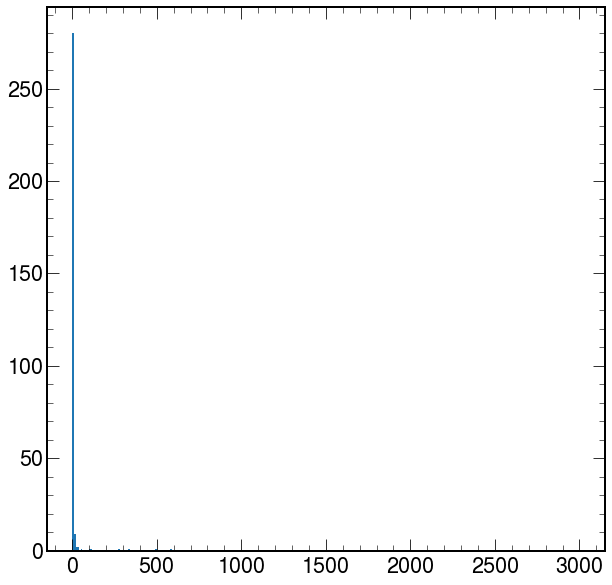

In [56]:
#gauss fit

def gauss(x, amp, mu, sigma):
    return amp*np.exp(-(x-mu)**2/(2*sigma)**2)

def gauss_fit(jet, edges, p0):
    
    
    n, bins, patches = plt.hist(jet, edges)
    
    x = np.linspace(50, 300, 300)
    
    y = n
    
    popt, pcov = curve_fit(gauss, x, y, p0, maxfev=100000)
    
    print(popt)
    
gauss_fit(jet0, edges, [600, 120, 4])